In [1]:
from datasets import list_datasets, load_dataset
from pprint import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
tqdm.pandas()

In [2]:
daily_dialogue_dataset = load_dataset('daily_dialog')  

Found cached dataset daily_dialog (/home/ahmed_b/.cache/huggingface/datasets/daily_dialog/default/1.0.0/1d0a58c7f2a4dab5ed9d01dbde8e55e0058e589ab81fce5c2df929ea810eabcd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
# datasets_list = list_datasets() 
# print(datasets_list) 

In [4]:
train_df = daily_dialogue_dataset["train"].to_pandas()
val_df = daily_dialogue_dataset["validation"].to_pandas()
test_df = daily_dialogue_dataset["test"].to_pandas()
all_df = pd.concat([train_df, val_df, test_df])
sample_df = all_df.iloc[:100]

In [5]:
df = all_df
#df = sample_df

In [6]:
!pwd

/home/ahmed_b/Master_Thesis


In [7]:
df = pd.read_pickle("dd_with_electra_emotions_df")
df.head()

,dialog,act,emotion,electra_emotion
0,"[Say , Jim , how about going for a few beers a...","[3, 4, 2, 2, 2, 3, 4, 1, 3, 4]","[0, 0, 0, 0, 0, 0, 4, 4, 4, 4]","[27, 10, 27, 3, 4, 4, 0, 17, 15, 4]"
1,"[Can you do push-ups ? , Of course I can . It...","[2, 1, 2, 2, 1, 1]","[0, 0, 6, 0, 0, 0]","[7, 4, 26, 7, 27, 4]"
2,"[Can you study with the radio on ? , No , I l...","[2, 1, 2, 1, 1]","[0, 0, 0, 0, 0]","[7, 27, 6, 27, 4]"
3,"[Are you all right ? , I will be all right so...","[2, 1, 1, 1]","[0, 0, 0, 0]","[7, 14, 5, 27]"
4,"[Hey John , nice skates . Are they new ? , Ye...","[2, 1, 2, 1, 1, 2, 1, 3, 4]","[0, 0, 0, 0, 0, 6, 0, 6, 0]","[0, 4, 7, 1, 0, 7, 27, 7, 4]"


In [8]:
emotion_categories = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral']

In [9]:
ekman_mapping = {"anger": "anger", "annoyance": "anger", "disapproval": "anger",
                 "disgust": "disgust",
                 "fear": "fear", "nervousness": "fear",
                 "admiration": "joy", "amusement": "joy", "approval": "joy", "caring": "joy", "desire": "joy", "excitement": "joy", "gratitude": "joy", "joy": "joy", "love": "joy", "optimism": "joy", "pride": "joy", "relief": "joy",
                 "sadness": "sadness", "disappointment": "sadness", "embarrassment": "sadness", "grief": "sadness", "remorse": "sadness",
                 "confusion": "surprise", "curiosity": "surprise", "realization": "surprise", "surprise": "surprise",
                 "neutral": "neutral"}

In [10]:
numeric_ekman = {"anger": 0, "disgust": 1, "fear": 2, "joy": 3, "sadness": 4, "surprise": 5, "neutral": 6}

In [11]:
df["ekman_emotion"] = df.electra_emotion.map(lambda x: [numeric_ekman[ekman_mapping[emotion_categories[emotion]]] for emotion in x])
df

,dialog,act,emotion,electra_emotion,ekman_emotion
0,"[Say , Jim , how about going for a few beers a...","[3, 4, 2, 2, 2, 3, 4, 1, 3, 4]","[0, 0, 0, 0, 0, 0, 4, 4, 4, 4]","[27, 10, 27, 3, 4, 4, 0, 17, 15, 4]","[6, 0, 6, 0, 3, 3, 3, 3, 3, 3]"
1,"[Can you do push-ups ? , Of course I can . It...","[2, 1, 2, 2, 1, 1]","[0, 0, 6, 0, 0, 0]","[7, 4, 26, 7, 27, 4]","[5, 3, 5, 5, 6, 3]"
2,"[Can you study with the radio on ? , No , I l...","[2, 1, 2, 1, 1]","[0, 0, 0, 0, 0]","[7, 27, 6, 27, 4]","[5, 6, 5, 6, 3]"
3,"[Are you all right ? , I will be all right so...","[2, 1, 1, 1]","[0, 0, 0, 0]","[7, 14, 5, 27]","[5, 2, 3, 6]"
4,"[Hey John , nice skates . Are they new ? , Ye...","[2, 1, 2, 1, 1, 2, 1, 3, 4]","[0, 0, 0, 0, 0, 6, 0, 6, 0]","[0, 4, 7, 1, 0, 7, 27, 7, 4]","[3, 3, 5, 3, 3, 5, 6, 5, 3]"
...,...,...,...,...,...
995,"[Frank ’ s getting married , do you believe th...","[2, 2, 1, 2, 1, 2, 1]","[0, 6, 0, 0, 0, 0, 0]","[7, 7, 18, 27, 27, 7, 27]","[5, 5, 3, 6, 6, 5, 6]"
996,"[OK . Come back into the classroom , class . ,...","[1, 2, 1, 1, 1, 2, 1]","[0, 0, 0, 5, 0, 0, 0]","[27, 27, 27, 27, 27, 27, 27]","[6, 6, 6, 6, 6, 6, 6]"
997,"[Do you have any hobbies ? , Yes , I like col...","[2, 1, 2, 1, 2, 1, 1]","[0, 4, 4, 0, 6, 0, 0]","[7, 18, 7, 27, 7, 27, 22]","[5, 3, 5, 6, 5, 6, 5]"
998,"[Jenny , what's wrong with you ? Why do you ke...","[2, 1, 1]","[0, 0, 0]","[7, 27, 27]","[5, 6, 6]"


In [12]:
len(df)

13118

In [13]:
def extract_train_sequences(list):
    subsequences = [list[:i] for i in range(1, len(list)+1)]
    
    train_sequences = [subsequence[:-1] for subsequence in subsequences[1:]]
    #targets = [subsequence[-1] for subsequence in subsequences[1:]]

    return train_sequences

In [14]:
def extract_targets(list):
    subsequences = [list[:i] for i in range(1, len(list)+1)]
    
    #train_sequences = [subsequence[:-1] for subsequence in subsequences[1:]]
    targets = [subsequence[-1] for subsequence in subsequences[1:]]

    return targets

In [15]:
def extract_emotion_sequence_df(df, emotion_column):
    train_sequences = []
    targets = []

    for i in range(len(df)):
        train_sequences.append(extract_train_sequences(list(df[emotion_column].iloc[i])))
        targets.append(extract_targets(list(df[emotion_column].iloc[i])))

    train_sequences = [item for sublist in train_sequences for item in sublist]
    targets = [item for sublist in targets for item in sublist]

    emotion_sequence_df = pd.DataFrame({"Sequence": train_sequences, "Target": targets})
    emotion_sequence_df["Sequence"] = emotion_sequence_df["Sequence"].apply(tuple)
    #emotion_sequence_df["Sequence"] = emotion_sequence_df["Sequence"].apply(lambda x: np.asarray(x).astype('int'))
    return emotion_sequence_df

In [16]:
def extract_dual_emotion_sequences_df(df, emotion_column):
    train_sequences = []
    targets = []

    for i in range(len(df)):
        emotion_list = list(df[emotion_column].iloc[i])
        
        train_sequence_1 = [emotion_list[:i:2] for i in range(len(emotion_list)) if i%2]
        targets_1 = emotion_list[1::2]

        train_sequence_2 = [emotion_list[1:i:2] for i in range(1, len(emotion_list)) if not i%2]
        targets_2 = emotion_list[2::2]
        
        train_sequences.append(train_sequence_1)
        targets.append(targets_1)
        if len(emotion_list) > 3:
            train_sequences.append(train_sequence_2)
            targets.append(targets_2)        
            
    train_sequences = [item for sublist in train_sequences for item in sublist]
    targets = [item for sublist in targets for item in sublist]

    emotion_sequence_df = pd.DataFrame({"Sequence": train_sequences, "Target": targets})
    emotion_sequence_df["Sequence"] = emotion_sequence_df["Sequence"].apply(tuple)
    return emotion_sequence_df

In [17]:
df

,dialog,act,emotion,electra_emotion,ekman_emotion
0,"[Say , Jim , how about going for a few beers a...","[3, 4, 2, 2, 2, 3, 4, 1, 3, 4]","[0, 0, 0, 0, 0, 0, 4, 4, 4, 4]","[27, 10, 27, 3, 4, 4, 0, 17, 15, 4]","[6, 0, 6, 0, 3, 3, 3, 3, 3, 3]"
1,"[Can you do push-ups ? , Of course I can . It...","[2, 1, 2, 2, 1, 1]","[0, 0, 6, 0, 0, 0]","[7, 4, 26, 7, 27, 4]","[5, 3, 5, 5, 6, 3]"
2,"[Can you study with the radio on ? , No , I l...","[2, 1, 2, 1, 1]","[0, 0, 0, 0, 0]","[7, 27, 6, 27, 4]","[5, 6, 5, 6, 3]"
3,"[Are you all right ? , I will be all right so...","[2, 1, 1, 1]","[0, 0, 0, 0]","[7, 14, 5, 27]","[5, 2, 3, 6]"
4,"[Hey John , nice skates . Are they new ? , Ye...","[2, 1, 2, 1, 1, 2, 1, 3, 4]","[0, 0, 0, 0, 0, 6, 0, 6, 0]","[0, 4, 7, 1, 0, 7, 27, 7, 4]","[3, 3, 5, 3, 3, 5, 6, 5, 3]"
...,...,...,...,...,...
995,"[Frank ’ s getting married , do you believe th...","[2, 2, 1, 2, 1, 2, 1]","[0, 6, 0, 0, 0, 0, 0]","[7, 7, 18, 27, 27, 7, 27]","[5, 5, 3, 6, 6, 5, 6]"
996,"[OK . Come back into the classroom , class . ,...","[1, 2, 1, 1, 1, 2, 1]","[0, 0, 0, 5, 0, 0, 0]","[27, 27, 27, 27, 27, 27, 27]","[6, 6, 6, 6, 6, 6, 6]"
997,"[Do you have any hobbies ? , Yes , I like col...","[2, 1, 2, 1, 2, 1, 1]","[0, 4, 4, 0, 6, 0, 0]","[7, 18, 7, 27, 7, 27, 22]","[5, 3, 5, 6, 5, 6, 5]"
998,"[Jenny , what's wrong with you ? Why do you ke...","[2, 1, 1]","[0, 0, 0]","[7, 27, 27]","[5, 6, 6]"


In [181]:
#emotion_sequence_df = extract_emotion_sequence_df(df, "emotion")
#emotion_sequence_df = extract_emotion_sequence_df(df, "electra_emotion")
emotion_sequence_df = extract_emotion_sequence_df(df, "ekman_emotion")
#emotion_sequence_df = extract_dual_emotion_sequences_df(df, "emotion")
#emotion_sequence_df = extract_dual_emotion_sequences_df(df, "electra_emotion")
#emotion_sequence_df = extract_dual_emotion_sequences_df(df, "ekman_emotion")
emotion_sequence_df.head(20)

,Sequence,Target
0,"(6,)",0
1,"(6, 0)",6
2,"(6, 0, 6)",0
3,"(6, 0, 6, 0)",3
4,"(6, 0, 6, 0, 3)",3
5,"(6, 0, 6, 0, 3, 3)",3
6,"(6, 0, 6, 0, 3, 3, 3)",3
7,"(6, 0, 6, 0, 3, 3, 3, 3)",3
8,"(6, 0, 6, 0, 3, 3, 3, 3, 3)",3
9,"(5,)",3


In [182]:
emotion_sequence_df.Target.value_counts()

3    33118
6    26195
5    22553
0     3758
4     3147
2      986
1      104
Name: Target, dtype: int64

In [183]:
emotion_sequence_df.value_counts().head(20)

Sequence   Target
(5,)       3         2393
           6         2131
           5         1334
(5, 3)     5         1140
(3,)       3         1135
(6,)       6         1032
(5, 6)     5          981
(6,)       5          911
           3          861
(3,)       5          657
(5, 3)     3          601
(3,)       6          503
(5, 3, 5)  3          492
(5, 6)     6          492
(5, 3)     6          467
(3, 3)     3          464
(5, 6, 5)  6          439
(5, 5)     3          432
           6          427
(5, 3, 5)  6          417
dtype: int64

In [180]:
emotion_sequence_df = emotion_sequence_df[emotion_sequence_df.Target !=27]
emotion_sequence_df = emotion_sequence_df[emotion_sequence_df.Sequence.apply(lambda x: x[-1] != 27)]

In [146]:
emotion_sequence_df

,Sequence,Target
2,"(27, 27, 4)",4
3,"(27, 27, 4, 0)",17
4,"(27, 27, 4, 0, 15)",4
6,"(10, 3)",4
7,"(10, 3, 4)",0
...,...,...
89403,"(17,)",0
89404,"(17, 23)",0
89405,"(17, 23, 0)",7
89406,"(17, 23, 0, 7)",5


In [ ]:
dd_emotion_categories = ["Other", "Anger", "Disgust", "Fear", "Happiness", "Sadness", "Surprise"]

In [65]:
emotion_categories[15]

'gratitude'

# Calling Electra Classifier

In [ ]:
print("Preparing Electra Classifier...")
from electra_classifier import *

best_model_path = "electra_cls/lightning_logs/version_18/checkpoints/epoch=9-step=3629.ckpt"
emotion_categories = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral']

MODEL_NAME = "google/electra-base-discriminator"
tokenizer = ElectraTokenizer.from_pretrained(MODEL_NAME)

trained_model = EmotionClassifier.load_from_checkpoint(
    # trainer.checkpoint_callback.best_model_path,
    best_model_path,
    n_classes=len(emotion_categories)
)

def predict_emotion_from_utterance(text):
  encoding = tokenizer(
          text,
          max_length=64, 
          truncation=True,
          padding="max_length",
          add_special_tokens=True,
          return_token_type_ids=False,
          return_attention_mask=True,
          return_tensors="pt"
      )
  outputs = trained_model(**encoding)
  emotion_idx = torch.argmax(outputs, dim=-1).item() 
  predicted_emotion = emotion_categories[emotion_idx]

  return predicted_emotion

print("Electra Classifier is ready!")

Preparing Electra Classifier...


In [ ]:
def label_with_electra(text_list):
    emotions_list = []
    for text in text_list:
        encoding = tokenizer(
              text,
              max_length=64, 
              truncation=True,
              padding="max_length",
              add_special_tokens=True,
              return_token_type_ids=False,
              return_attention_mask=True,
              return_tensors="pt"
          )
        # outputs = trained_model(encoding["input_ids"], encoding["attention_mask"])
        outputs = trained_model(**encoding)
        emotion_idx = torch.argmax(outputs, dim=-1).item() 
        #predicted_emotion = emotion_categories[emotion_idx]
        emotions_list.append(emotion_idx)
    return emotions_list

In [ ]:
df["electra_emotion"] = df["dialog"].progress_apply(lambda x: label_with_electra(x))

In [ ]:
df.to_pickle("dd_with_electra_emotions_df")


In [ ]:
loaded_df = pd.read_pickle("dd_with_electra_emotions_df")


In [ ]:
df

In [ ]:
electra_emotion_sequence_df = extract_emotion_sequence_df(df, "electra_emotion")

In [ ]:
electra_emotion_sequence_df.head()

# Trying to predict the emotion using LSTM network

In [171]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# separate the features (sequence) and target variables
X = emotion_sequence_df['Sequence']
y = emotion_sequence_df['Target']

# instantiate the random oversampler
ros = RandomOverSampler(random_state=42)

# fit the random oversampler to the data
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)

# convert back to pandas DataFrame
emotion_sequence_df = pd.DataFrame(X_resampled, columns=['Sequence'])
emotion_sequence_df['Target'] = y_resampled

# check the new class balance
print(emotion_sequence_df['Target'].value_counts())


10    26084
3     26084
16    26084
19    26084
11    26084
9     26084
23    26084
12    26084
25    26084
22    26084
8     26084
2     26084
24    26084
18    26084
13    26084
20    26084
1     26084
5     26084
14    26084
6     26084
26    26084
7     26084
15    26084
0     26084
27    26084
17    26084
4     26084
21    26084
Name: Target, dtype: int64


In [187]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import layers

# Define the data
"""data = pd.DataFrame({'Sequence': {0: np.array([0]),
                                  1: np.array([0, 1]),
                                  2: np.array([5, 0, 3]),
                                  3: np.array([7, 0, 3, 0]),
                                  4: np.array([1, 0, 2, 2, 0])},
                     'Target': {0: 2, 1: 0, 2: 6, 3: 7, 4: 0}})"""

emotion_sequence_df["Sequence"] = emotion_sequence_df["Sequence"].apply(lambda x: np.asarray(x))
data = pd.DataFrame(emotion_sequence_df.to_dict())

# Convert sequences to input data
max_len = max(map(len, data['Sequence']))
#X = np.zeros((len(data), max_len), dtype=int)
X = np.ones((len(data), max_len), dtype=int)
#X = -1*X
X = 0*X

for i, seq in enumerate(data['Sequence']):
    # X[i, :len(seq)] = seq
    X[i, -len(seq):] = seq

# Convert targets to categorical
num_classes = max(data['Target']) + 1
y = to_categorical(data['Target'], num_classes=num_classes)

# Divide the data into train, test and validation
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:train_size+test_size], y[train_size:train_size+test_size]
X_val, y_val = X[-val_size:], y[-val_size:]

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

# Define the LSTM model
model = Sequential()
#model.add(
#    layers.Bidirectional(
#        LSTM(units=64, input_shape=(X_train.shape[1], 1))
#    )
#)
#model.add(Dense(units=32, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=128, input_shape=(X_train.shape[1], 1)))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(28, activation='softmax'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=512)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}, test accuracy: {accuracy:.3f}')

# Make predictions on new data
new_data = pd.DataFrame({'Sequence': {0: np.array([0, 1, 2]),
                                      1: np.array([5, 0]),
                                      2: np.array([1, 0, 2, 2, 0, 1]),
                                      3: np.array([7, 0, 3, 0, 2, 1, 6])}})
X_new = np.zeros((len(new_data), max_len), dtype=int)
for i, seq in enumerate(new_data['Sequence']):
    X_new[i, :len(seq)] = seq
X_new = np.reshape(X_new, (X_new.shape[0], X_new.shape[1], 1))
y_new = model.predict(X_new)
print(f'Predictions:\n{y_new}')


Epoch 1/10
123/123 [==============================] - 28s 193ms/step - loss: 1.4243 - accuracy: 0.3638 - val_loss: 1.3665 - val_accuracy: 0.3705
Epoch 2/10
123/123 [==============================] - 22s 180ms/step - loss: 1.3797 - accuracy: 0.3752 - val_loss: 1.3649 - val_accuracy: 0.3720
Epoch 3/10
123/123 [==============================] - 23s 184ms/step - loss: 1.3775 - accuracy: 0.3774 - val_loss: 1.3647 - val_accuracy: 0.3785
Epoch 4/10
123/123 [==============================] - 22s 179ms/step - loss: 1.3756 - accuracy: 0.3791 - val_loss: 1.3656 - val_accuracy: 0.3763
Epoch 5/10
123/123 [==============================] - 22s 176ms/step - loss: 1.3725 - accuracy: 0.3878 - val_loss: 1.3598 - val_accuracy: 0.3869
Epoch 6/10
123/123 [==============================] - 22s 180ms/step - loss: 1.3696 - accuracy: 0.3891 - val_loss: 1.3598 - val_accuracy: 0.3880
Epoch 7/10
123/123 [==============================] - 22s 178ms/step - loss: 1.3683 - accuracy: 0.3921 - val_loss: 1.3605 - val_ac

In [185]:
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
confusion_matrix = tf.math.confusion_matrix(
    labels=np.argmax(y_test, axis=1),
    predictions=y_pred_labels,
    num_classes=num_classes
)

print(confusion_matrix)

562/562 [==============================] - 5s 9ms/step
tf.Tensor(
[[   0    0    0  527    0   55   61]
 [   0    0    0   14    0    2    2]
 [   0    0    0  139    0   32   23]
 [   0    0    0 5217    0  545  603]
 [   0    0    0  429    0   88   37]
 [   0    0    0 3312    0  742  590]
 [   0    0    0 4215    0  583  756]], shape=(7, 7), dtype=int32)


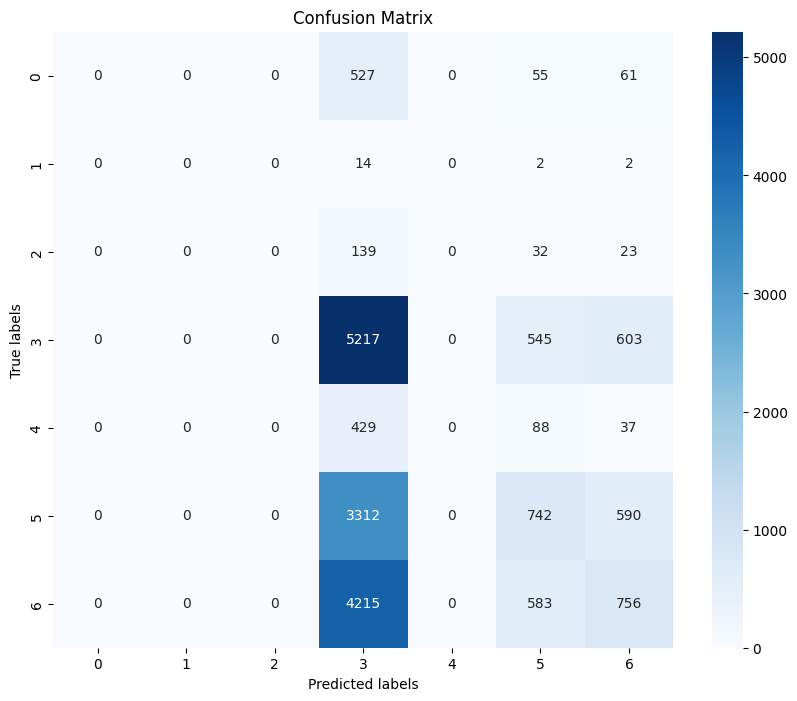

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)

# Set the axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Display the figure
plt.show()


In [191]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), y_pred_labels, target_names=list(numeric_ekman.keys())))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       643
     disgust       0.00      0.00      0.00        18
        fear       0.00      0.00      0.00       194
         joy       0.38      0.82      0.52      6365
     sadness       0.00      0.00      0.00       554
    surprise       0.36      0.16      0.22      4644
     neutral       0.36      0.14      0.20      5554

    accuracy                           0.37     17972
   macro avg       0.16      0.16      0.13     17972
weighted avg       0.34      0.37      0.30     17972



/home/ahmed_b/.conda/envs/electra_cls/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ahmed_b/.conda/envs/electra_cls/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ahmed_b/.conda/envs/electra_cls/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [189]:
list(numeric_ekman.keys())

['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']

In [42]:
y_pred_labels[1]

array([0.04817674, 0.00097255, 0.00880989, 0.38428116, 0.02767852,
       0.22708528, 0.30299586], dtype=float32)

In [87]:
# Make predictions on new data
new_data = pd.DataFrame({'Sequence': {0: np.array([0, 0, 0]),
                                      1: np.array([27])
                                     }})
#X_new = np.zeros((len(new_data), max_len), dtype=int)
X_new = np.ones((len(new_data), max_len), dtype=int)
X_new = -1*X_new

for i, seq in enumerate(new_data['Sequence']):
    #X_new[i, :len(seq)] = seq
    X_new[i, -len(seq):] = seq
X_new = np.reshape(X_new, (X_new.shape[0], X_new.shape[1], 1))
y_new = model.predict(X_new)
print(f'Predictions:\n{y_new}')

1/1 [==============================] - 0s 108ms/step
Predictions:
[[0.12396784 0.00443553 0.00728167 0.00865584 0.10362588 0.01733943
  0.02694337 0.29899067 0.01229952 0.01006881 0.02954359 0.00228215
  0.00107843 0.01970471 0.00595489 0.05740481 0.00059164 0.02729928
  0.02031069 0.00378586 0.01225784 0.0004073  0.00528429 0.00135117
  0.01007999 0.0079696  0.00999524 0.17108998]
 [0.05123136 0.00287026 0.00558564 0.01029231 0.07869978 0.02417594
  0.03696224 0.30302107 0.01506774 0.00979475 0.02079715 0.00155749
  0.00072339 0.01701965 0.00779575 0.03675175 0.00046196 0.01134587
  0.00724072 0.00181891 0.00711563 0.00031494 0.00556116 0.0015357
  0.01676753 0.01079721 0.01107906 0.3036151 ]]


In [63]:
def extract_emotion_chain(emotion_list, number_of_emotions = 7):
    emotions_chain = dict()
    for i in range(number_of_emotions):
        emotions_chain ["emotions_following_" + str(i)] = []

    old_emotion_number = 0
    for list_index, emotion_number in enumerate(emotion_list):
        if list_index > 0:
            emotions_chain["emotions_following_" + str(int(old_emotion_number))].append(emotion_number)
            old_emotion_number = emotion_number
    return emotions_chain

In [64]:
sample_df["emotion_chain"] = sample_df["emotion"].apply(lambda x: extract_emotion_chain(x))
sample_df                                           

/home/ahmed_b/.conda/envs/electra_cls/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dialog,act,emotion,emotion_chain
0,"[Say , Jim , how about going for a few beers a...","[3, 4, 2, 2, 2, 3, 4, 1, 3, 4]","[0, 0, 0, 0, 0, 0, 4, 4, 4, 4]","{'emotions_following_0': [0, 0, 0, 0, 0, 4], '..."
1,"[Can you do push-ups ? , Of course I can . It...","[2, 1, 2, 2, 1, 1]","[0, 0, 6, 0, 0, 0]","{'emotions_following_0': [0, 6, 0, 0], 'emotio..."
2,"[Can you study with the radio on ? , No , I l...","[2, 1, 2, 1, 1]","[0, 0, 0, 0, 0]","{'emotions_following_0': [0, 0, 0, 0], 'emotio..."
3,"[Are you all right ? , I will be all right so...","[2, 1, 1, 1]","[0, 0, 0, 0]","{'emotions_following_0': [0, 0, 0], 'emotions_..."
4,"[Hey John , nice skates . Are they new ? , Ye...","[2, 1, 2, 1, 1, 2, 1, 3, 4]","[0, 0, 0, 0, 0, 6, 0, 6, 0]","{'emotions_following_0': [0, 0, 0, 0, 6, 6], '..."
...,...,...,...,...
95,[How was your education going on in Australia ...,"[2, 1, 2, 1, 3, 4, 1]","[0, 0, 0, 0, 0, 0, 0]","{'emotions_following_0': [0, 0, 0, 0, 0, 0], '..."
96,"[Do you have any particular hobbies , Tom ? , ...","[2, 1, 2, 1, 2, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0]","{'emotions_following_0': [0, 0, 0, 0, 0, 0, 0]..."
97,"[What ’ s the plot of your new movie ? , It ’...","[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]","{'emotions_following_0': [0, 0, 0, 0, 0, 0, 0,..."
98,"[Who's that old lady trimming the trees ? , S...","[2, 1, 2, 1]","[0, 0, 0, 0]","{'emotions_following_0': [0, 0, 0], 'emotions_..."


In [65]:
all_df["emotion_chain"] = all_df["emotion"].apply(lambda x: extract_emotion_chain(x))
all_df 

,dialog,act,emotion,emotion_chain
0,"[Say , Jim , how about going for a few beers a...","[3, 4, 2, 2, 2, 3, 4, 1, 3, 4]","[0, 0, 0, 0, 0, 0, 4, 4, 4, 4]","{'emotions_following_0': [0, 0, 0, 0, 0, 4], '..."
1,"[Can you do push-ups ? , Of course I can . It...","[2, 1, 2, 2, 1, 1]","[0, 0, 6, 0, 0, 0]","{'emotions_following_0': [0, 6, 0, 0], 'emotio..."
2,"[Can you study with the radio on ? , No , I l...","[2, 1, 2, 1, 1]","[0, 0, 0, 0, 0]","{'emotions_following_0': [0, 0, 0, 0], 'emotio..."
3,"[Are you all right ? , I will be all right so...","[2, 1, 1, 1]","[0, 0, 0, 0]","{'emotions_following_0': [0, 0, 0], 'emotions_..."
4,"[Hey John , nice skates . Are they new ? , Ye...","[2, 1, 2, 1, 1, 2, 1, 3, 4]","[0, 0, 0, 0, 0, 6, 0, 6, 0]","{'emotions_following_0': [0, 0, 0, 0, 6, 6], '..."
...,...,...,...,...
995,"[Frank ’ s getting married , do you believe th...","[2, 2, 1, 2, 1, 2, 1]","[0, 6, 0, 0, 0, 0, 0]","{'emotions_following_0': [6, 0, 0, 0, 0], 'emo..."
996,"[OK . Come back into the classroom , class . ,...","[1, 2, 1, 1, 1, 2, 1]","[0, 0, 0, 5, 0, 0, 0]","{'emotions_following_0': [0, 0, 5, 0, 0], 'emo..."
997,"[Do you have any hobbies ? , Yes , I like col...","[2, 1, 2, 1, 2, 1, 1]","[0, 4, 4, 0, 6, 0, 0]","{'emotions_following_0': [4, 6, 0], 'emotions_..."
998,"[Jenny , what's wrong with you ? Why do you ke...","[2, 1, 1]","[0, 0, 0]","{'emotions_following_0': [0, 0], 'emotions_fol..."


In [9]:
#emotion_chain_df = pd.concat([pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in train_df.iloc[i]["emotion_chain"].items() ])) for i in range(len(sample_df))]).fillna(0).astype('int')

In [66]:
emotion_chain_df = pd.concat([pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in all_df.iloc[i]["emotion_chain"].items() ])) for i in range(len(all_df))])

/home/ahmed_b/.conda/envs/electra_cls/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [67]:
emotion_chain_df

,emotions_following_0,emotions_following_1,emotions_following_2,emotions_following_3,emotions_following_4,emotions_following_5,emotions_following_6
0,0.0,NaN,NaN,NaN,4.0,NaN,NaN
1,0.0,NaN,NaN,NaN,4.0,NaN,NaN
2,0.0,NaN,NaN,NaN,4.0,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1,4.0,NaN,NaN,NaN,4.0,NaN,NaN
2,0.0,NaN,NaN,NaN,0.0,NaN,NaN
3,6.0,NaN,NaN,NaN,4.0,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='emotions_following_6', ylabel='Count'>

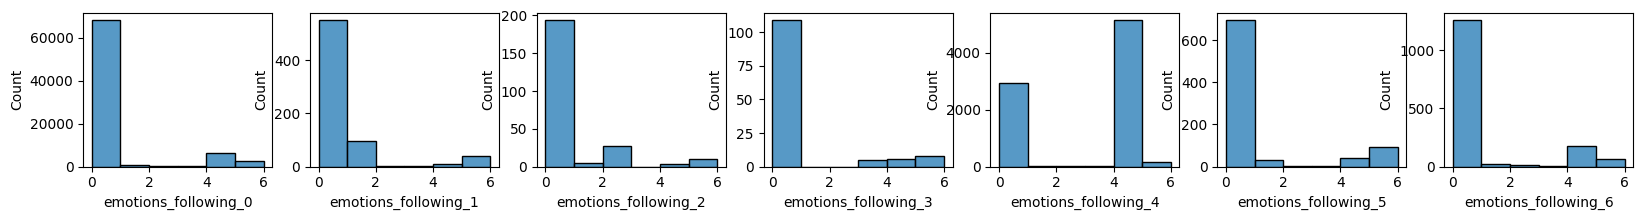

In [68]:
fig, ax = plt.subplots(1, 7, figsize=(20, 2))
xlabels = [0, 1, 2, 3, 4, 5, 6]

sns.histplot(emotion_chain_df['emotions_following_0'], bins=xlabels, ax=ax[0])
sns.histplot(emotion_chain_df['emotions_following_1'], bins=xlabels, ax=ax[1])
sns.histplot(emotion_chain_df['emotions_following_2'], bins=xlabels, ax=ax[2])
sns.histplot(emotion_chain_df['emotions_following_3'], bins=xlabels, ax=ax[3])
sns.histplot(emotion_chain_df['emotions_following_4'], bins=xlabels, ax=ax[4])
sns.histplot(emotion_chain_df['emotions_following_5'], bins=xlabels, ax=ax[5])
sns.histplot(emotion_chain_df['emotions_following_6'], bins=xlabels, ax=ax[6])

<AxesSubplot:xlabel='emotions_following_6', ylabel='Count'>

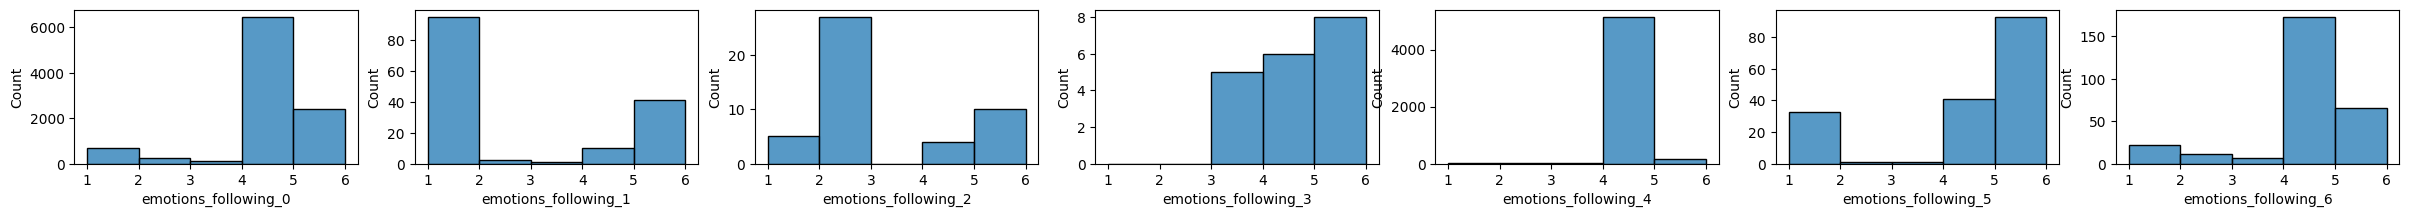

In [69]:
fig, ax = plt.subplots(1, 7, figsize=(30, 2))
xlabels = [1, 2, 3, 4, 5, 6]

sns.histplot(emotion_chain_df['emotions_following_0'], bins=xlabels, ax=ax[0])
sns.histplot(emotion_chain_df['emotions_following_1'], bins=xlabels, ax=ax[1])
sns.histplot(emotion_chain_df['emotions_following_2'], bins=xlabels, ax=ax[2])
sns.histplot(emotion_chain_df['emotions_following_3'], bins=xlabels, ax=ax[3])
sns.histplot(emotion_chain_df['emotions_following_4'], bins=xlabels, ax=ax[4])
sns.histplot(emotion_chain_df['emotions_following_5'], bins=xlabels, ax=ax[5])
sns.histplot(emotion_chain_df['emotions_following_6'], bins=xlabels, ax=ax[6])

# Labelling the dataset with my own labels

In [14]:
from typing import Optional
import os

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

from torch.utils.data import Dataset, DataLoader
from torch import nn
import torchmetrics
from transformers import ElectraModel, ElectraPreTrainedModel, ElectraTokenizerFast as ElectraTokenizer, AdamW
from transformers.models.electra.modeling_electra import ElectraClassificationHead

from transformers import ElectraTokenizerFast as ElectraTokenizer

import torch
import pytorch_lightning as pl
from sklearn.model_selection import train_test_split

%matplotlib inline 
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette (sns.color_palette (HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

pl.seed_everything(42)

Global seed set to 42


42

In [15]:
class ElectraClassifier(ElectraPreTrainedModel):
  def __init__(self, config):
    super().__init__(config)
    self.n_classes = config.num_labels
    self.config = config
    self.electra = ElectraModel(config)
    self.classifier = ElectraClassificationHead(config)

    self.post_init()

  def forward(
      self,
      input_ids=None,
      attention_mask=None
  ):
    discriminator_hidden_states = self.electra(input_ids, attention_mask)
    sequence_output = discriminator_hidden_states[0]
    logits = self.classifier(sequence_output)
    return logits

class EmotionClassifier(pl.LightningModule):
  def __init__(self, n_classes, learning_rate: Optional[float]=None):
    super().__init__()
    self.n_classes = n_classes
    self.classifier = ElectraClassifier.from_pretrained(
        "google/electra-base-discriminator",
        #"google/electra-base-discriminator",
        num_labels=n_classes
    )
    self.criterion = nn.CrossEntropyLoss()
    self.learning_rate = learning_rate

  def forward(self, input_ids, attention_mask):
    return self.classifier(input_ids, attention_mask)

  def run_step(self, batch, stage):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["label"].long()
    logits = self(input_ids, attention_mask)

    loss = self.criterion(logits, labels)
    self.log(f"{stage}_loss", loss, on_step=True, on_epoch=True, prog_bar=True)

    return loss

  def training_step(self, batch, batch_idx):
    return self.run_step(batch, "train")

  def validation_step(self, batch, batch_idx):
    return self.run_step(batch, "val")

  def test_step(self, batch, batch_idx):
    return self.run_step(batch, "test")

  def configure_optimizers(self):
    return AdamW(self.parameters(), lr=self.learning_rate)

In [16]:
best_model_path = "electra_cls/lightning_logs/version_18/checkpoints/epoch=9-step=3629.ckpt"
emotion_categories = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral']

MODEL_NAME = "google/electra-base-discriminator"
tokenizer = ElectraTokenizer.from_pretrained(MODEL_NAME)

In [17]:
trained_model = EmotionClassifier.load_from_checkpoint(
    # trainer.checkpoint_callback.best_model_path,
    best_model_path,
    n_classes=len(emotion_categories)
)

Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraClassifier: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraClassifier from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraClassifier from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraClassifier were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_pr

In [18]:
def Predict_emotion(text, top_k=3):
  encoding = tokenizer(
          text,
          max_length=64, 
          truncation=True,
          padding="max_length",
          add_special_tokens=True,
          return_token_type_ids=False,
          return_attention_mask=True,
          return_tensors="pt"
      )
  # outputs = trained_model(encoding["input_ids"], encoding["attention_mask"])
  outputs = trained_model(**encoding)
  probabilities = list(torch.softmax(outputs, dim=-1).detach().numpy().flatten())
  emotion_idx = torch.argmax(outputs, dim=-1).item() 
  predicted_emotion = emotion_categories[emotion_idx]

  emotion_categories_list = list(emotion_categories)
  probabilities, emotion_categories_list = zip(*sorted(zip(probabilities, emotion_categories_list)))
  probabilities = probabilities[::-1]
  emotion_categories_list = emotion_categories_list[::-1]

  print(f'The sentence "{sample_text}"')
  print(f"Expresses the {predicted_emotion.upper()} emotion ({100*probabilities[0]:.0f}%).")

  print("\n-- Other probabilities: --\n")
  k = 1
  for label, probability in zip(list(emotion_categories_list), list(probabilities)):
    print(f"P({label}) = {100*probability:.2f}%.")
    k += 1
    if k > top_k: 
      break

In [44]:
sample_text = "It smells like an ashtray in here!."
Predict_emotion(sample_text)

The sentence "It smells like an ashtray in here!."
Expresses the DISGUST emotion (82%).

-- Other probabilities: --

P(disgust) = 81.52%.
P(annoyance) = 12.82%.
P(disapproval) = 1.96%.


In [20]:
def label_with_electra(text_list):
    emotions_list = []
    for text in text_list:
        encoding = tokenizer(
              text,
              max_length=64, 
              truncation=True,
              padding="max_length",
              add_special_tokens=True,
              return_token_type_ids=False,
              return_attention_mask=True,
              return_tensors="pt"
          )
        # outputs = trained_model(encoding["input_ids"], encoding["attention_mask"])
        outputs = trained_model(**encoding)
        emotion_idx = torch.argmax(outputs, dim=-1).item() 
        #predicted_emotion = emotion_categories[emotion_idx]
        emotions_list.append(emotion_idx)
    return emotions_list

In [21]:
from tqdm.auto import tqdm
tqdm.pandas()

In [22]:
#df = all_df
df = sample_df

In [23]:
df["electra_emotion"] = df["dialog"].progress_apply(lambda x: label_with_electra(x))

  0%|          | 0/100 [00:00<?, ?it/s]

/home/ahmed_b/.conda/envs/electra_cls/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df["emotion"].head()

0    [0, 0, 0, 0, 0, 0, 4, 4, 4, 4]
1                [0, 0, 6, 0, 0, 0]
2                   [0, 0, 0, 0, 0]
3                      [0, 0, 0, 0]
4       [0, 0, 0, 0, 0, 6, 0, 6, 0]
Name: emotion, dtype: object

In [71]:
df["electra_emotion_chain"] = df["electra_emotion"].progress_apply(lambda x: extract_emotion_chain(x, len(emotion_categories)))

  0%|          | 0/13118 [00:00<?, ?it/s]

In [72]:
len(df)

13118

In [73]:
df.head()

,dialog,act,emotion,electra_emotion,ekman_emotion,electra_emotion_chain
0,"[Say , Jim , how about going for a few beers a...","[3, 4, 2, 2, 2, 3, 4, 1, 3, 4]","[0, 0, 0, 0, 0, 0, 4, 4, 4, 4]","[27, 10, 27, 3, 4, 4, 0, 17, 15, 4]","[6, 0, 6, 0, 3, 3, 3, 3, 3, 3]","{'emotions_following_0': [10, 17], 'emotions_f..."
1,"[Can you do push-ups ? , Of course I can . It...","[2, 1, 2, 2, 1, 1]","[0, 0, 6, 0, 0, 0]","[7, 4, 26, 7, 27, 4]","[5, 3, 5, 5, 6, 3]","{'emotions_following_0': [4], 'emotions_follow..."
2,"[Can you study with the radio on ? , No , I l...","[2, 1, 2, 1, 1]","[0, 0, 0, 0, 0]","[7, 27, 6, 27, 4]","[5, 6, 5, 6, 3]","{'emotions_following_0': [27], 'emotions_follo..."
3,"[Are you all right ? , I will be all right so...","[2, 1, 1, 1]","[0, 0, 0, 0]","[7, 14, 5, 27]","[5, 2, 3, 6]","{'emotions_following_0': [14], 'emotions_follo..."
4,"[Hey John , nice skates . Are they new ? , Ye...","[2, 1, 2, 1, 1, 2, 1, 3, 4]","[0, 0, 0, 0, 0, 6, 0, 6, 0]","[0, 4, 7, 1, 0, 7, 27, 7, 4]","[3, 3, 5, 3, 3, 5, 6, 5, 3]","{'emotions_following_0': [4, 7], 'emotions_fol..."


In [74]:
# define the sequence of integers to find
sequence = [2, 2]

# use apply with a lambda function to check if the sequence is present in each row
result = df[df['electra_emotion'].apply(lambda x: any(x[i:i+len(sequence)] == sequence for i in range(len(x)-len(sequence)+1)))]

print(f"there are {len(result)} elements with anger following anger")

there are 11 elements with anger following anger


In [38]:
4 in df["emotion"].iloc[0].tolist()

True

In [47]:
result = df[df['emotion'].apply(lambda x: 1 in x.tolist())]

print(f"there are {len(result)} elements with anger label")
result[["dialog", "emotion", "electra_emotion"]].head()

there are 4 elements with anger label


,dialog,emotion,electra_emotion
65,"[I'll never ever work together with him ! , W...","[1, 0, 1, 0]","[10, 27, 7, 10]"
66,"[Oh , my God ! I've been cheated ! , What ? W...","[1, 6, 1, 0, 1, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, ...","[9, 7, 2, 6, 27, 7, 27, 27, 4, 2, 8, 27, 13, 6..."
72,"[It smells like an ashtray in here ! , Hi hon...","[1, 0, 1, 0, 1, 0, 1]","[11, 7, 7, 10, 27, 6, 8]"
74,[It seems that you get antsy when you hear I p...,"[0, 2, 0, 2, 0, 1, 0, 6]","[0, 3, 6, 27, 4, 7, 27, 27]"


In [33]:
dd_emotion_categories = ["Other", "Anger", "Disgust", "Fear", "Happiness", "Sadness", "Surprise"]

for ind, emotion_label in enumerate(dd_emotion_categories):
    print(f"{ind} : {emotion_label}")

0 : Other
1 : Anger
2 : Disgust
3 : Fear
4 : Happiness
5 : Sadness
6 : Surprise


In [31]:
for ind, emotion_label in enumerate(emotion_categories):
    print(f"{ind} : {emotion_label}")

0 : admiration
1 : amusement
2 : anger
3 : annoyance
4 : approval
5 : caring
6 : confusion
7 : curiosity
8 : desire
9 : disappointment
10 : disapproval
11 : disgust
12 : embarrassment
13 : excitement
14 : fear
15 : gratitude
16 : grief
17 : joy
18 : love
19 : nervousness
20 : optimism
21 : pride
22 : realization
23 : relief
24 : remorse
25 : sadness
26 : surprise
27 : neutral


In [75]:
electra_emotion_chain_df = pd.concat([pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in df.iloc[i]["electra_emotion_chain"].items() ])) for i in range(len(df))])

/home/ahmed_b/.conda/envs/electra_cls/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [76]:
electra_emotion_chain_df.head()

,emotions_following_0,emotions_following_1,emotions_following_2,emotions_following_3,emotions_following_4,emotions_following_5,emotions_following_6,emotions_following_7,emotions_following_8,emotions_following_9,...,emotions_following_18,emotions_following_19,emotions_following_20,emotions_following_21,emotions_following_22,emotions_following_23,emotions_following_24,emotions_following_25,emotions_following_26,emotions_following_27
0,10.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,17.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4.0,NaN,NaN,NaN,26.0,NaN,NaN,27.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,4.0
0,27.0,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


  0%|          | 0/28 [00:00<?, ?it/s]

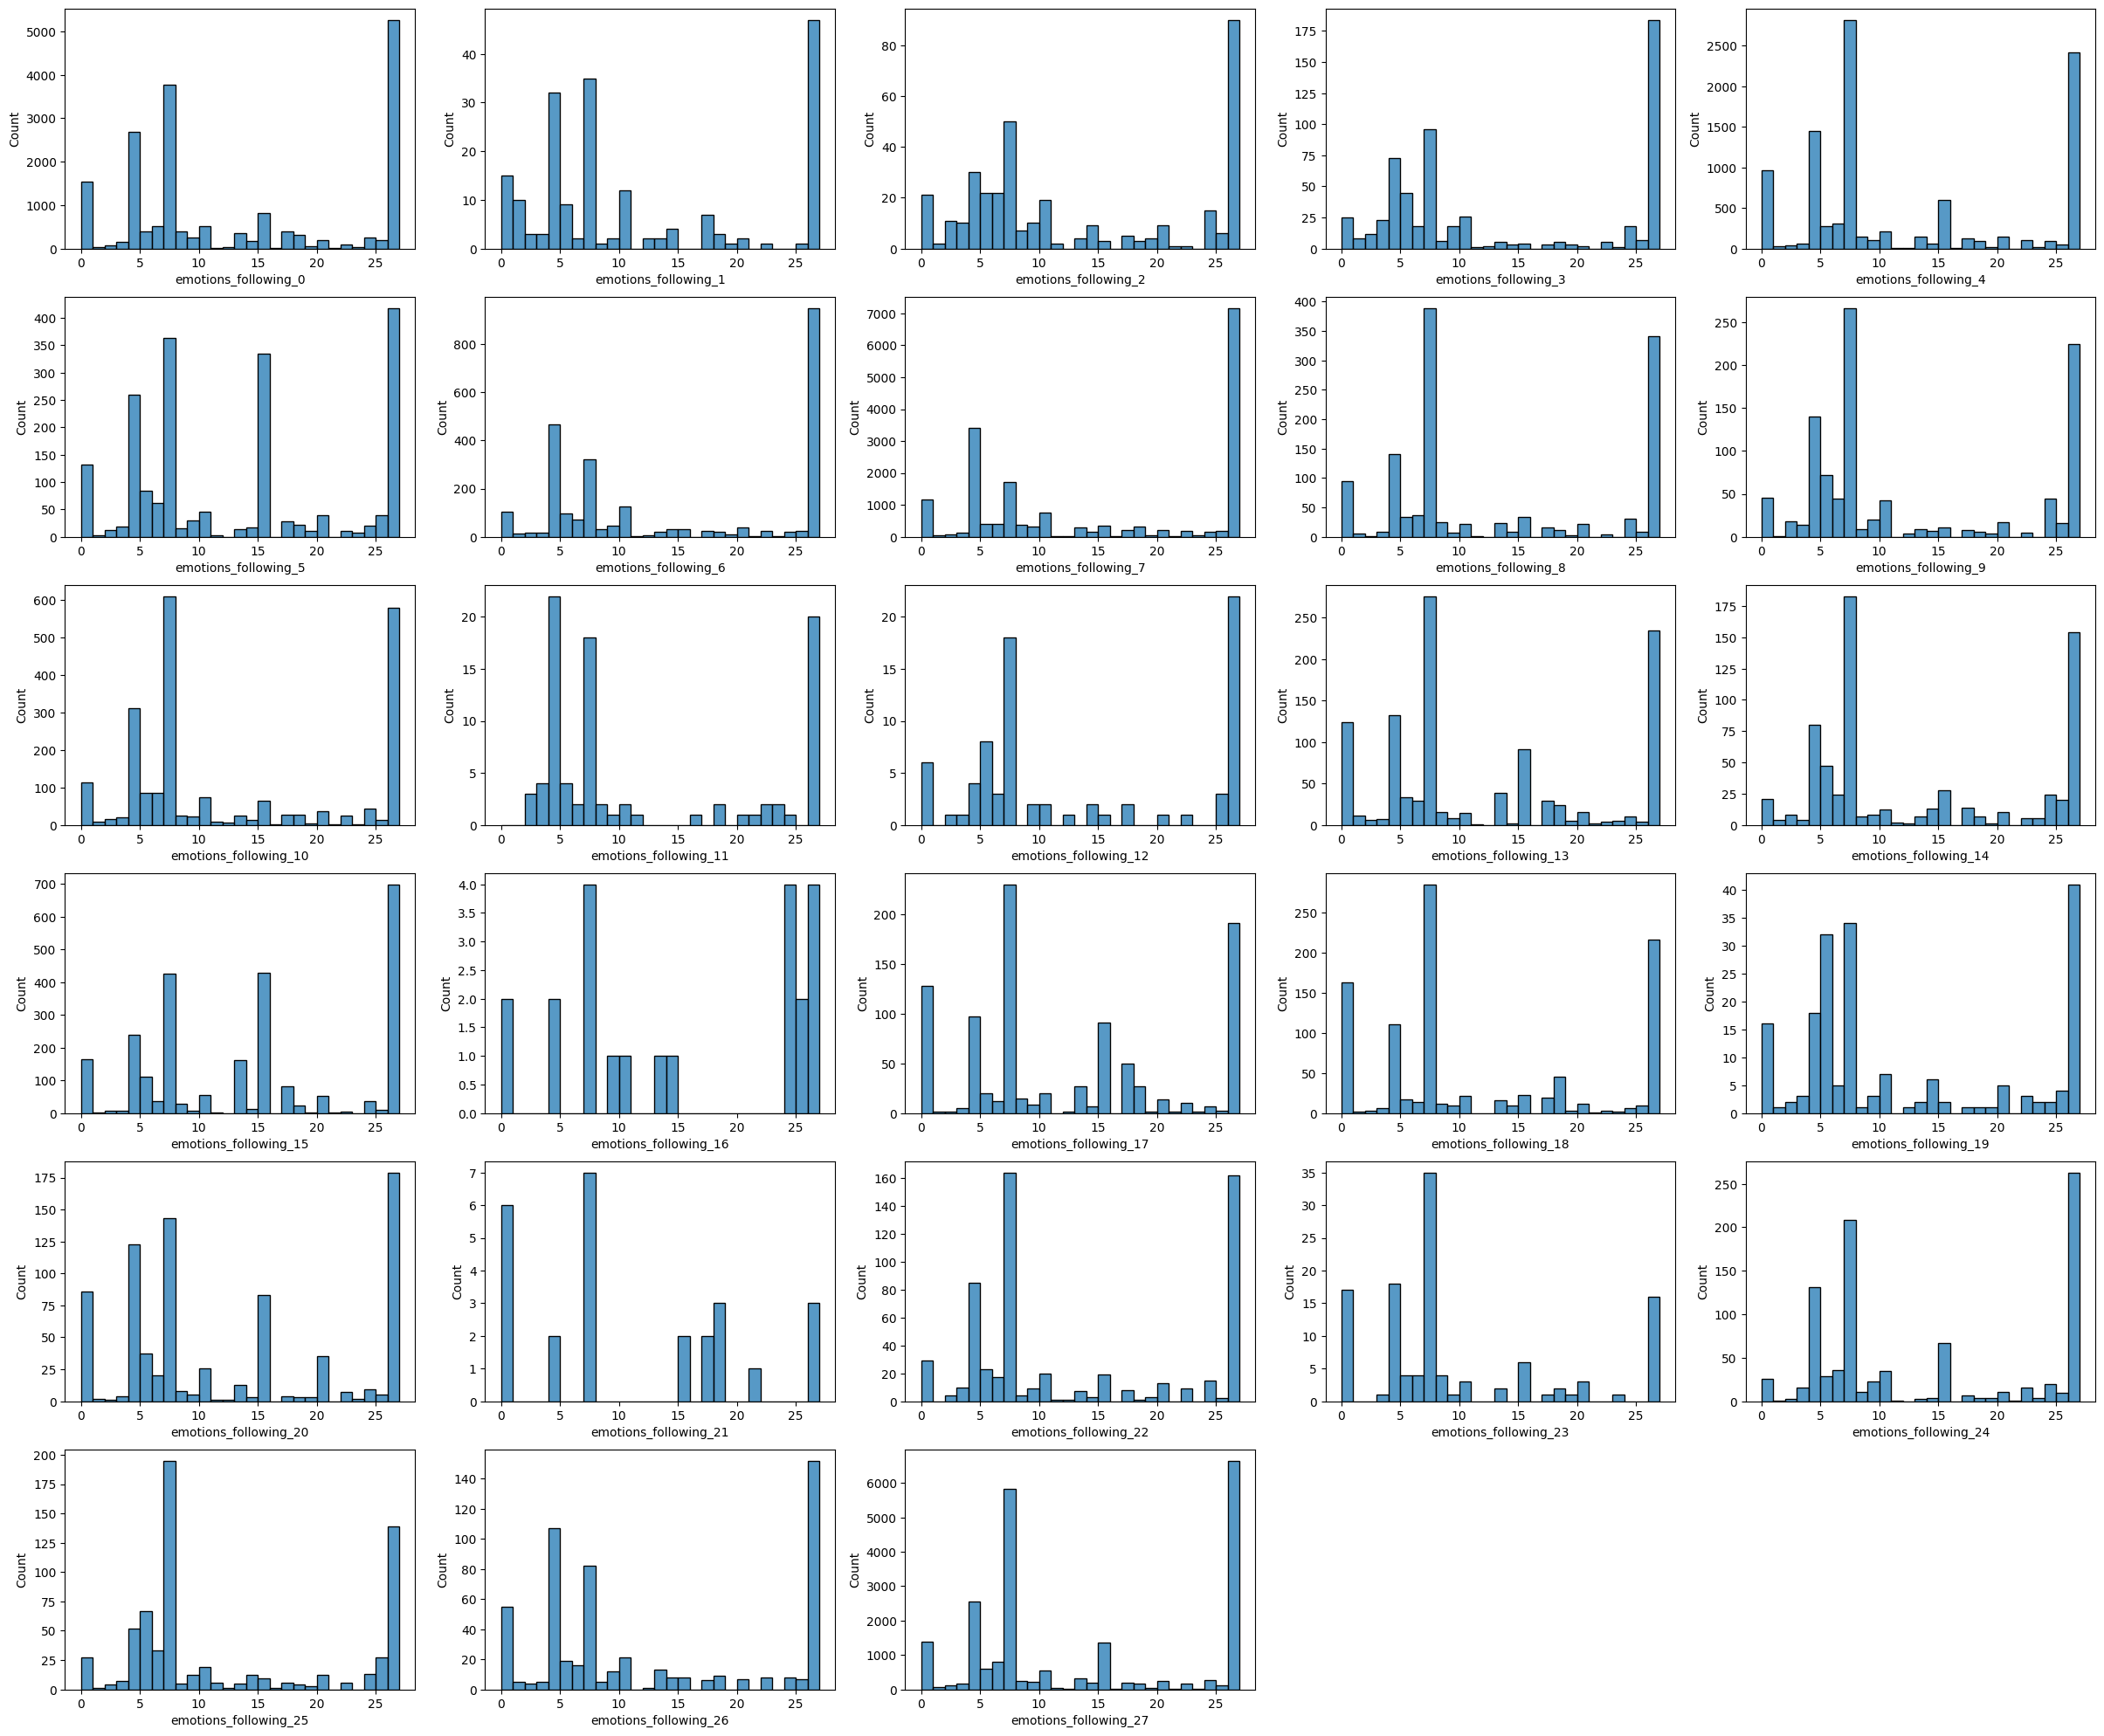

In [94]:
Tot = 28
Cols = 5
Rows = Tot // Cols 
if Tot % Cols != 0:
    Rows += 1
Position = range(1,Tot + 1)

xlabels = []
#xlabels.extend(range(len(emotion_categories)-1))
xlabels.extend(range(len(emotion_categories)))

fig = plt.figure(figsize=(30, 25))
for k in tqdm(range(Tot)):
    ax = fig.add_subplot(Rows,Cols,Position[k])
    sns.histplot(electra_emotion_chain_df['emotions_following_'+str(k)], bins=xlabels, ax=ax)
plt.show()

In [93]:
electra_emotion_chain_df.mode().iloc[0].value_counts()

27.0    14
7.0     13
4.0      1
Name: 0, dtype: int64

## Save results as pickle not to have to repeat the electra emotion processing

In [41]:
electra_emotion_chain_df.to_pickle("electra_emotion_chain_df")
emotion_chain_df.to_pickle("emotion_chain_df")
all_df.to_pickle("all_df")

## Load dataframes from pickle files 

In [3]:
loaded_electra_emotion_chain_df = pd.read_pickle("electra_emotion_chain_df")
loaded_emotion_chain_df = pd.read_pickle("emotion_chain_df")
loaded_all_df = pd.read_pickle("all_df")

## Visualizing results

## Using Electra emotion labels

  0%|          | 0/28 [00:00<?, ?it/s]

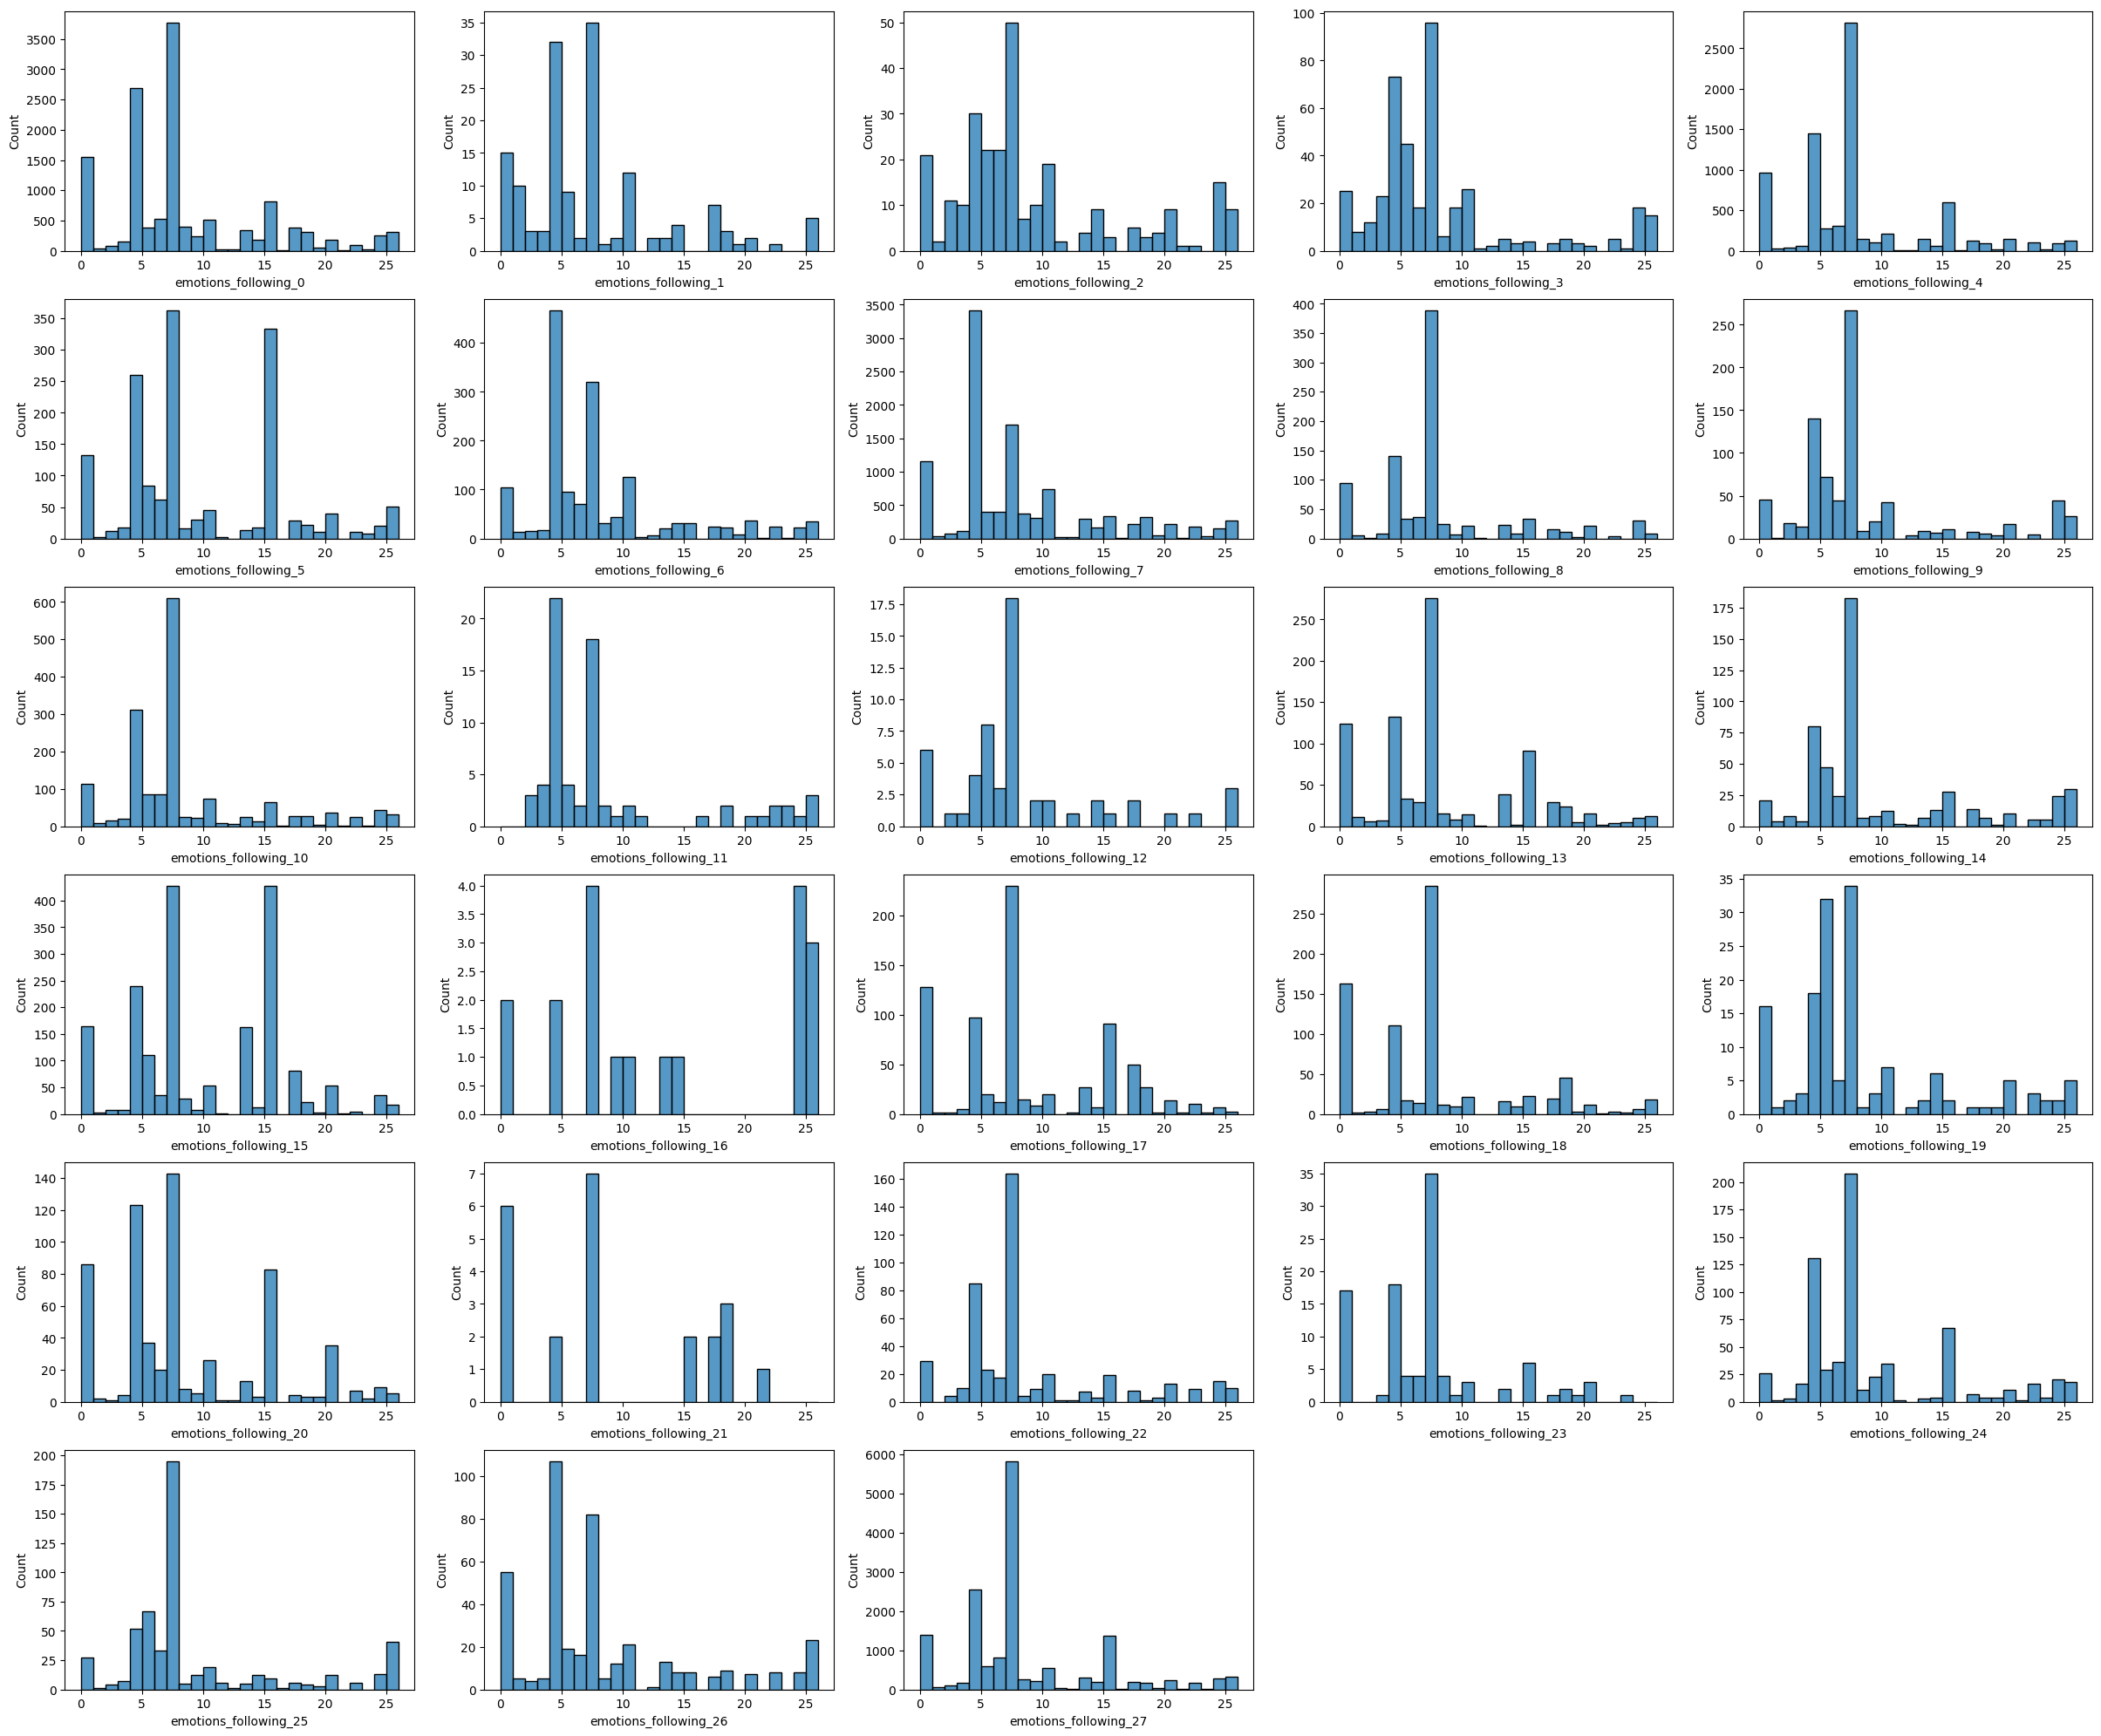

In [7]:
emotion_categories = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral']

Tot = 28
Cols = 5
Rows = Tot // Cols 
if Tot % Cols != 0:
    Rows += 1
Position = range(1,Tot + 1)

xlabels = []

xlabels.extend(range(len(emotion_categories)-1))

fig = plt.figure(figsize=(30, 25))
for k in tqdm(range(Tot)):
    ax = fig.add_subplot(Rows,Cols,Position[k])
    sns.histplot(loaded_electra_emotion_chain_df['emotions_following_'+str(k)], bins=xlabels, ax=ax)
plt.show()

### Using DailyDialog native emotion labels

NameError: name 'emotion_chain_df' is not defined

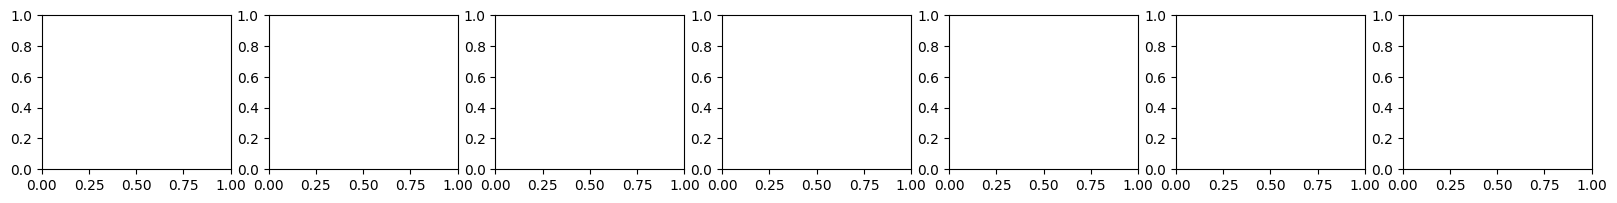

In [4]:
fig, ax = plt.subplots(1, 7, figsize=(20, 2))
xlabels = [0, 1, 2, 3, 4, 5, 6]

sns.histplot(emotion_chain_df['emotions_following_0'], bins=xlabels, ax=ax[0])
sns.histplot(emotion_chain_df['emotions_following_1'], bins=xlabels, ax=ax[1])
sns.histplot(emotion_chain_df['emotions_following_2'], bins=xlabels, ax=ax[2])
sns.histplot(emotion_chain_df['emotions_following_3'], bins=xlabels, ax=ax[3])
sns.histplot(emotion_chain_df['emotions_following_4'], bins=xlabels, ax=ax[4])
sns.histplot(emotion_chain_df['emotions_following_5'], bins=xlabels, ax=ax[5])
sns.histplot(emotion_chain_df['emotions_following_6'], bins=xlabels, ax=ax[6])

### Using Electra emotion labels

In [38]:
electra_emotion_chain_df.emotions_following_0.value_counts()

27.0    5143
7.0     3775
4.0     2689
0.0     1549
15.0     817
6.0      523
10.0     510
8.0      401
5.0      389
17.0     385
13.0     345
18.0     311
24.0     253
9.0      245
25.0     190
20.0     187
14.0     177
3.0      148
26.0     124
22.0     101
2.0       80
19.0      52
1.0       37
12.0      30
23.0      30
11.0      19
16.0       8
21.0       6
Name: emotions_following_0, dtype: int64

In [39]:
emotion_categories[7]

'curiosity'